## Здравствуйте, меня зовут *Дмитрий Попов*, вот моё Задание №2 по курсу ПСАД-2020!

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
from collections import defaultdict
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

np.random.seed(228)

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

### Задача 1  

Задана выборка, включающая значения переменной $X$. 

X sample mean:  5.206


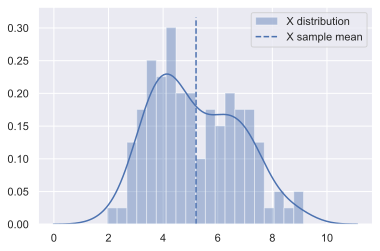

In [3]:
X = pd.read_excel('t1_data.xlsx').values.ravel()

sns.distplot(X, label='X distribution', bins=20)
plt.vlines(X.mean(), *plt.ylim(), linestyles='--', colors='b', label="X sample mean")
plt.legend()
print("X sample mean: ", np.round(X.mean(), 3))
plt.show()

Определите доверительный интервал для математического ожидания на уровне $\alpha$ (для каждого $\alpha$ из списка) c использованием...

In [4]:
alpha_list = np.array([0.1, 0.075, 0.05, 0.025, 0.01]) 

Распределения Стьюдента

In [5]:
def student_mci(data, alpha=0.05):
    data_mean = data.mean()
    data_std = data.std(ddof=1)
    quantile = scipy.stats.t(data.shape[0] - 1).ppf(1 - alpha / 2)
    interval_width = quantile * data_std / np.sqrt(data.shape[0])
    
    return (data_mean - interval_width, data_mean + interval_width)

Бутстрэп оценивания

In [6]:
def bootstrap_mci(data, alpha=0.05):
    data_means = np.random.choice(data, [10000, data.shape[0]]).mean(axis=1)
    data_se_b = data_means.std(ddof=1)
    quantile = scipy.stats.t(data.shape[0] - 1).ppf(1 - alpha / 2)
    interval_width = quantile * data_se_b
    interval_mean = data_means.mean()
    
    return (interval_mean - interval_width, interval_mean + interval_width)

Сравните результаты и сделайте выводы.

In [7]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Student"] = [np.round(student_mci(X, alpha), 3) for alpha in alpha_list]
res["Bootstrap"] = [np.round(bootstrap_mci(X, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Student,Bootstrap
0,0.100,"[4.956, 5.456]","[4.956, 5.452]"
1,0.075,"[4.935, 5.477]","[4.935, 5.478]"
2,0.050,"[4.907, 5.505]","[4.911, 5.501]"
3,0.025,"[4.863, 5.549]","[4.863, 5.549]"
4,0.010,"[4.81, 5.602]","[4.81, 5.601]"


**Выводы:** результаты бутстреп-оценивания и с использованием распределения Стьюдента достаточно близки, что свидетельствует о том, что в данном случае параметр оценён достаточно точно.

### Задача 2

Два предприятия выпускают  изделия одного и того же назначения. Предприятие I выпускает изделия с математическим ожиданием срока службы $T_1$, предприятие II выпускает изделия с математическим ожиданием срока службы $T_2$. Сроки службы изделий обоих предприятий распределены нормально и стандартные отклонения для них равны $\sigma_1$ и $\sigma_2$ соответственно. При этом $T_1 < T_2$, но изделия второго предприятия дороже.

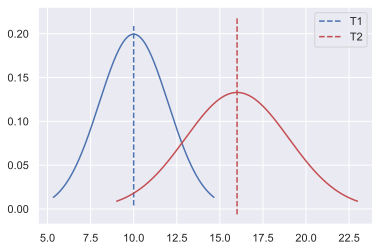

In [8]:
T1, T2, sigma1, sigma2 = 10, 16, 2, 3

def plot_T(T, sigma, c, label):
    norm = sp.stats.norm(loc=T, scale=sigma)
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
    plt.plot(x, norm.pdf(x), c=c)
    plt.vlines(T, *plt.ylim(), linestyles='--', colors=c, label=label)
    
plot_T(T1, sigma1, 'b', 'T1')
plot_T(T2, sigma2, 'r', 'T2')
plt.legend()
plt.show()

Третье предприятие утверждает, что ему удалось разработать технологию производства изделий со средним сроком службы  предприятия II, но по цене предприятия I. В качестве доказательства предлагаются результаты тестирования для $k$ изделий. 

Нулевая гипотеза $H_0$ предполагает, что на самом деле срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия I. Альтернативная гипотеза $H_1$ предполагает, что срок службы изделий предприятия III имеет распределение, совпадающее с распределением срока службы изделий предприятия II. Проверка этих двух предположений производится путем сравнения эмпирически оцененного среднего срока службы протестированных изделий предприятия III с некоторым порогом $T$. Конкретное значение $T$ находится из условия того, что допустимая ошибка первого рода равна $\alpha$. Значение ошибки второго рода обозначим через $\beta = \beta(\alpha, k)$.

Постройте график мощности такого теста в зависимости от $k$ и сделайте выводы.

In [9]:
def test_power(k=10, alpha=0.05):
    T = scipy.stats.norm(loc=T1, scale=sigma1 / np.sqrt(k)).ppf(1 - alpha)
    power = scipy.stats.norm(loc=T2, scale=sigma2 / np.sqrt(k)).sf(T)
    return power

def plot_power_to_alpha(alpha=0.05):
    powers = [test_power(k, alpha) for k in range(1, 12)]
    
    plt.figure(figsize=(10, 7))
    plt.plot(range(1, 12), powers, label='Test power')
    plt.title('Test power ~ number of observations')
    plt.xticks(range(1, 12))
    plt.xlabel('Number of samples')
    plt.ylabel('Test power')

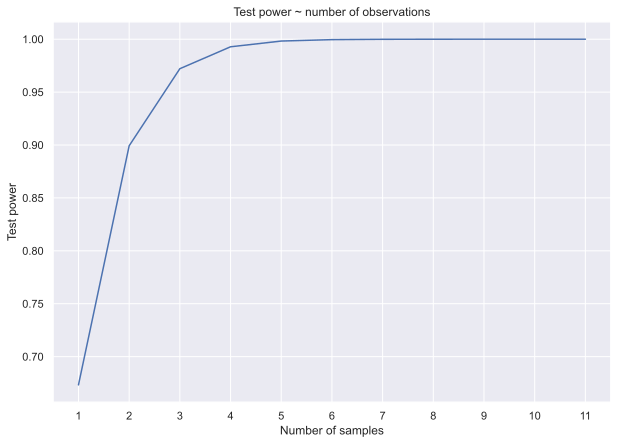

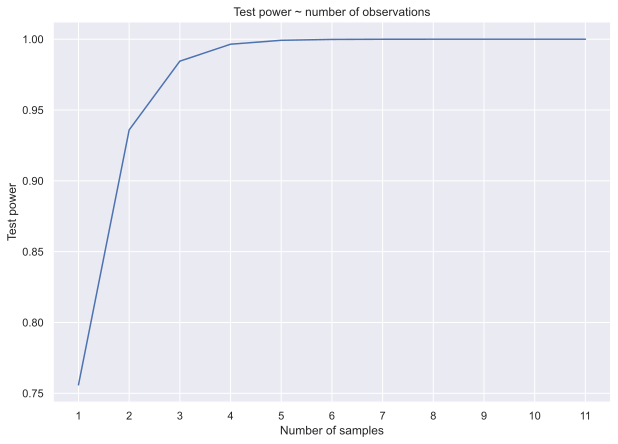

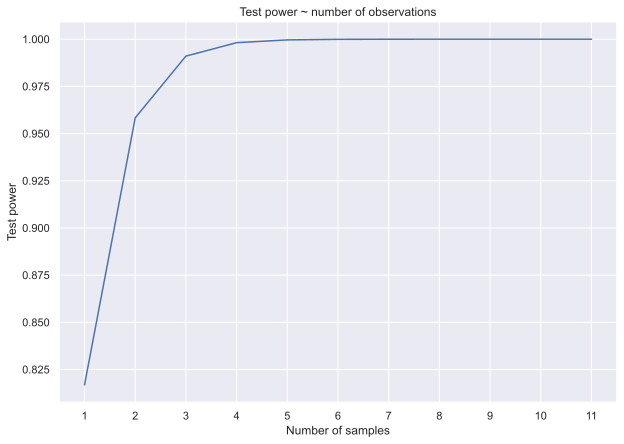

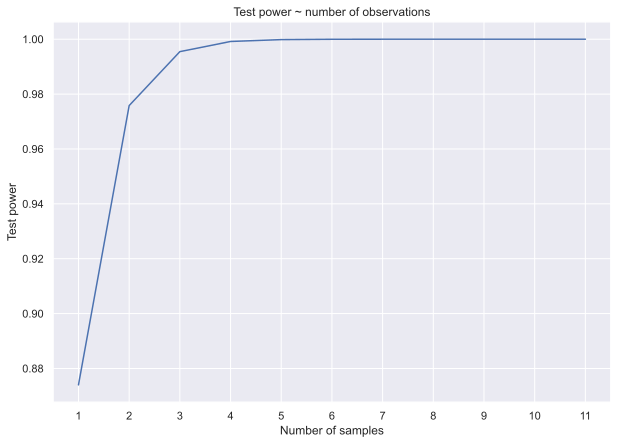

In [10]:
for alpha in [0.01, 0.025, 0.05, 0.1]:
    plot_power_to_alpha(alpha)

**Выводы:** вне зависимости от выбранного порога значимости альфа зависимость ведёт себя одинаково. Мощность теста очень быстро стремится к единице и достигает приемлемого значения уже при 4-5 выбранных объектах. 

### Задача 3

В 5 серии 13 сезона передачи “Разрушители легенд” проверялась справедливость выражения “know something like the back of one’s hand”. В эксперименте принимало участие 12 испытуемых. Каждому из них были предъявлены 10 фотографий похожих рук разных людей, среди которых они должны были угадать свою.
11 из 12 испытуемых выбрали свою фотографию.
\($H_0$\): испытуемые выбирают фотографии тыльной стороны руки наугад (\($p$=0.1\)).
\($H_1$\): испытуемые выбирают фотографию тыльной стороны своей собственной руки осознанно (\($p>0.1$\)).


Воспользуйтесь точным биномиальным критерием для проверки (H_0) против альтернативы (H_1). Для этого:

	• Постройте нулевое распределение статистики числа успехов в выборке распределения Бернулли с параметром p. Сформируйте выборку сами напрямую из условия задачи.
	• Напишите функцию, которая принимала бы на вход тройку чисел (np,nq,p0), где np – число успехов, nq – число неудач в выборке размера np + nq, p0 – значение параметра p, задающего нулевую гипотезу. Ваша функция должна возвращать значение достигаемого уровня значимости против правосторонней альтернативы.
	• Визуально сравните поведение значения, выдаваемые вашей функцией со стандартным тестом
    scipy.stats.binom_test(·)
	• Отвергается ли гипотеза (H_0) на достигаемом уровне значимости 0.05? p-value?

In [12]:
n_p, n_q, p = 11, 1, 0.1
n = n_p + n_q

data = np.zeros(12, dtype=np.int32)
data[7] = 1
data

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

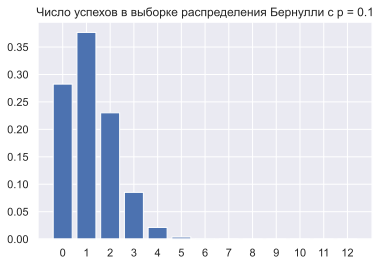

In [13]:
plt.bar(range(n + 1), scipy.stats.binom(n=n, p=p).pmf(range(n + 1)))
plt.xticks(range(n + 1))
plt.title('Число успехов в выборке распределения Бернулли с p = 0.1')
plt.show()

In [14]:
def binom_test(n_p, n_q, p0):
    n = n_p + n_q
    prob_less = scipy.stats.binom(n=n, p=p0).cdf(n_p - 1)
    return 1 - prob_less

In [15]:
p0 = 0.1
for n_p in range(n):
    print(binom_test(n_p, n - n_p, p0), scipy.stats.binom_test([n_p, n - n_p], p=p, alternative='greater'))

1.0 1.0
0.7175704635189999 0.7175704635189999
0.3409977482109998 0.34099774821100026
0.11086997774499996 0.11086997774500003
0.025637470164999954 0.025637470165000002
0.004329343270000008 0.004329343270000001
0.0005412318220000545 0.0005412318220000001
5.0180337999972124e-05 5.0180338000000016e-05
3.413529999996001e-06 3.4135300000000017e-06
1.6583499995448392e-07 1.6583500000000006e-07
5.455000007259514e-09 5.455000000000003e-09
1.0900003122316093e-10 1.0900000000000006e-10


In [16]:
p0 = 0.1
for n_p in range(n):
    print(binom_test(n_p, n - n_p, p0) - scipy.stats.binom_test([n_p, n - n_p], p=p, alternative='greater'))

0.0
0.0
-4.440892098500626e-16
-6.938893903907228e-17
-4.85722573273506e-17
6.938893903907228e-18
5.442694905877232e-17
-2.78911008871896e-17
-4.0005366098820605e-18
-4.551613598387748e-17
7.259510763694007e-18
3.1223160868367006e-17


**Выводы:** написанная функция ведёт себя одинаково с эталоном. При числе успехов 11 уровень значимости исчезающе мал, поэтому гипотеза H_0 отвергается. 

### Задача 4

24 умственно отсталых ребёнка с СДВГ в течение недели принимали либо метилфенидат, либо плацебо, а в конце недели проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, после недельного курса каждый испытуемые проходили второй тест.
Каков эффект препарата?

In [17]:
adhd = pd.read_csv("ADHD.txt", sep=' ')
adhd.sample(5)

,D0,D60
8,34,45
0,57,62
22,33,45
12,26,36
20,34,35


In [18]:
adhd.shape

(24, 2)

Чтобы использовать $t$-критерий Стьюдента для связанных выборок, необходимо проверить, нет ли существенных отклонений от нормальности попарных разностей. Для этого воспользуйтесь визуальной проверкой нормальности (функция `qqplot` из `statsmodels`), a также библиотечным тестом проверки нормальности: `scipy.stats.shapiro`

In [19]:
scipy.stats.shapiro(adhd['D0'] - adhd['D60'])

(0.9798052906990051, 0.8922504186630249)

p-value высок, значит, не отвергаем нулевую гипотезу о нормальности выборки.

In [20]:
import statsmodels.api as sm

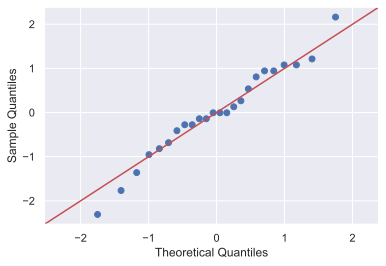

In [21]:
sm.graphics.qqplot(adhd['D0'] - adhd['D60'], fit=True, line='45');

In [22]:
res = scipy.stats.cumfreq(adhd['D0'] - adhd['D60'])
res

CumfreqResult(cumcount=array([ 1.,  2.,  3.,  6., 11., 16., 18., 23., 23., 24.]), lowerlimit=-23.833333333333332, binsize=3.666666666666668, extrapoints=0)

In [23]:
x = res.lowerlimit + np.linspace(0, res.binsize*(res.cumcount.size-1), res.cumcount.size - 1)

<BarContainer object of 9 artists>

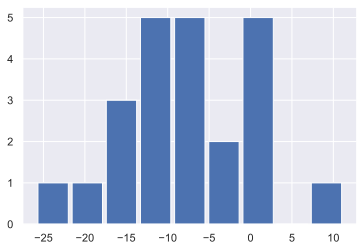

In [24]:
plt.bar(x, res.cumcount[1:] - res.cumcount[:-1], width=res.binsize)

Автор работы считает, что это распределение не нормально. Возможно, данных просто недостаточно. Применим тем не менее критерии.

Примените $t$-критерий Стьюдента `scipy.stats.ttest_rel` для связанных выборок.

In [25]:
scipy.stats.ttest_rel(adhd['D0'], adhd['D60'])

Ttest_relResult(statistic=-3.2223624451230406, pvalue=0.003771488176381471)

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок `scipy.stats.ttest_ind`. Сравните результаты применения критерия Стьюдента к этим данным, если считать выборки связанными и не связанными. В какои из этих случаев уровень достигаемой значимости меньше? Как вы думаете почему?

In [26]:
scipy.stats.ttest_ind(adhd['D0'], adhd['D60'])

Ttest_indResult(statistic=-1.452163501815909, pvalue=0.1532433046938409)

**Выводы:** рассмотрение QQ-графика, графика эмпирической плотности и результатов теста Шапиро-Уилка дало противоречивые результаты. Поскольку выборка маленькая, нельзя сказать, действительно ли данные нормальны. Возможно, это так.

Тест для связанных выборок говорит, что препарат влияет на поведение детей, тест для несвязанных не даёт возможности отвергнуть гипотезу о том, что не влияет. Поскольку в данном случае выборки по построению связаны, доверять можно только тесту с учётом связи.

Вообще говоря, это очень странный эксперимент. Вне зависимости от работы препарата при одинаковых размерах групп одна 
из групп после применения препарата должна демонстрировать матожидание ниже на тот же самый порог, на который вторая демонстрирует матожидание выше. После усреднения получаем, что матожидания не должны измениться, поэтому в теории при достаточно больших выборках тесты должны показывать, что препарат не работает. Хотя всё это рассуждение проведено с учётом того, что препарат работает только во время приёма и успевает вывестись из организма за неделю. В любом случае, автор считает, что эксперимент надо проводить по-другому (их и проводят по-другому).

### Задача 5

Задана выборка $Y$ результатов распознавания для некоторой задачи классификации.

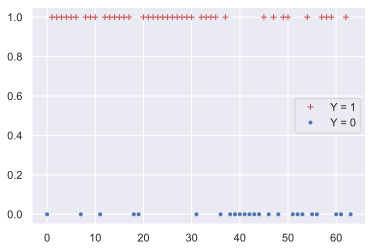

In [27]:
Y = pd.read_excel("t2_data.xlsx").values.ravel()

plt.plot(np.arange(Y.size)[Y == 1], np.count_nonzero(Y == 1) * [1], 'r+', label='Y = 1')
plt.plot(np.arange(Y.size)[Y == 0], np.count_nonzero(Y == 0) * [0], 'b.', label='Y = 0')
plt.legend()
plt.show()

Оцените доверительный интервал для показателя *ACCURACY* с использованием...

Метода Клоппера-Пирсона (с использованием аппроксимации через __бета__ распределение).

    http://en.wikipedia.org/wiki/Binomial_proportion_confidence_interval
    alpha confidence intervals for a binomial distribution of k expected successes on n trials

In [31]:
import statsmodels

In [32]:
def bin_clopper_pearson(data, alpha=0.05):
    n_p = data.sum()
    n = data.size
    
    return (scipy.stats.beta(n_p, n - n_p + 1).ppf(alpha / 2), scipy.stats.beta(n_p + 1, n - n_p).ppf(1 - alpha / 2))

In [34]:
for alpha in [0.01, 0.025, 0.05, 0.1]:
    my = bin_clopper_pearson(Y, alpha)
    etalon = statsmodels.stats.proportion.proportion_confint(Y.sum(), Y.size, alpha, 'beta')
    print(my[0] - etalon[0], my[1] - etalon[1])

0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


А также с помощью __нормальной__ аппроксимации

In [35]:
def bin_normal_approx(data, alpha=0.05):
    n_p = Y.sum()
    n = data.size
    z = scipy.stats.norm.ppf(1 - alpha / 2)
    interval_width = z * np.sqrt(n_p / n * (n - n_p)) / n
    
    return (n_p / n - interval_width, n_p / n + interval_width)

In [36]:
for alpha in [0.01, 0.025, 0.05, 0.1]:
    my = bin_normal_approx(Y, alpha)
    etalon = statsmodels.stats.proportion.proportion_confint(Y.sum(), Y.size, alpha, 'normal')
    print(my[0] - etalon[0], my[1] - etalon[1])

0.0 0.0
-1.1102230246251565e-16 1.1102230246251565e-16
1.1102230246251565e-16 -1.1102230246251565e-16
1.1102230246251565e-16 -1.1102230246251565e-16


Сравните результаты и сделайте выводы.

In [37]:
res = defaultdict(list)
res["alpha"] = alpha_list
res["Clopper-Pearson"] = [np.round(bin_clopper_pearson(Y, alpha), 3) for alpha in alpha_list]
res["Normal"] = [np.round(bin_normal_approx(Y, alpha), 3) for alpha in alpha_list]
res = pd.DataFrame(res)
res

,alpha,Clopper-Pearson,Normal
0,0.100,"[0.515, 0.726]","[0.525, 0.725]"
1,0.075,"[0.506, 0.733]","[0.517, 0.733]"
2,0.050,"[0.495, 0.743]","[0.506, 0.744]"
3,0.025,"[0.478, 0.757]","[0.489, 0.761]"
4,0.010,"[0.457, 0.774]","[0.469, 0.781]"


In [38]:
res['Clopper-Pearson'] - res['Normal']

0    [-0.010000000000000009, 0.0010000000000000009]
1                       [-0.01100000000000001, 0.0]
2    [-0.01100000000000001, -0.0010000000000000009]
3    [-0.01100000000000001, -0.0040000000000000036]
4    [-0.011999999999999955, -0.007000000000000006]
dtype: object

Также сравните ваши реализованные метод с библиотечными: `statsmodels.stats.proportion.proportion_confint`, в вариантах  `proportion_confint(k, n, alpha, 'beta')` и `proportion_confint(k, n, alpha, 'normal')`

In [39]:
n = Y.size
p = Y.sum() / n

In [40]:
n >= 50

True

In [41]:
n * p >= 10

True

In [42]:
n * (1 - p) >= 10

True

**Выводы:** для данной задачи метод Клоппера-Пирсона является точным, метод нормальной аппроксимации даёт только приближённый результат, которому можно доверять только при выполнении некоторых условий на размер выборки и частоту успехов и неудач. В данном случае рекомендованные условия из статьи-источника для указанной статьи на Википедии выполнены. И действительно, здесь наблюдается достаточно хорошее приближение точных границ интервалов методом нормальной аппроксимации.